Importing Libraries

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import mnist

Load Dataset


In [4]:
def load_images(data_dir):
    data = []
    labels = []
    for label in os.listdir(data_dir):
        for img in os.listdir(os.path.join(data_dir, label)):
            img_path = os.path.join(data_dir, label, img)
            img = load_img(img_path, target_size=(32, 32)) # adjust the size to match your model input size
            img_data = img_to_array(img)
            data.append(img_data)
            labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    
    return data,labels

Create Validation Set

In [5]:
X_train,y_train=load_images('train')
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [6]:
X_train_new.shape

(1350, 32, 32, 3)

In [7]:
X_val.shape

(150, 32, 32, 3)

In [8]:
y_train_new.shape

(1350,)

In [9]:
y_val.shape

(150,)

Normalising

In [10]:
X_train_new=X_train_new/255
X_val=X_val/255

To One Hot Encoded format

In [16]:
encoder = LabelEncoder()
numeric_labels_train = encoder.fit_transform(y_train_new)
numeric_labels_val = encoder.transform(y_val)

num_classes = len(encoder.classes_)
y_train_categorical = to_categorical(numeric_labels_train, num_classes=num_classes)
y_val_categorical = to_categorical(numeric_labels_val, num_classes=num_classes)

In [20]:
y_train_categorical.shape

(1350, 3)

Model Architecture

In [22]:
from keras.layers import Dense , Conv2D, Flatten, MaxPooling2D
model = Sequential()
num_classes = len(np.unique(y_train)) 
input_shape = (32, 32, 3)

# Adding Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(input_shape)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# Max Pooling after the first set of convolutions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Again adding Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# Max Pooling after the second set of convolutions
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

Compiling The Model

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Training The Model

Epoch 1/50


7/7 [==============================] - 7s 508ms/step - loss: 1.1218 - accuracy: 0.4007 - val_loss: 1.0624 - val_accuracy: 0.4000
Epoch 2/50
7/7 [==============================] - 3s 424ms/step - loss: 1.0156 - accuracy: 0.4822 - val_loss: 0.9261 - val_accuracy: 0.6133
Epoch 3/50
7/7 [==============================] - 3s 402ms/step - loss: 0.8988 - accuracy: 0.6467 - val_loss: 0.9269 - val_accuracy: 0.5933
Epoch 4/50
7/7 [==============================] - 3s 403ms/step - loss: 0.7423 - accuracy: 0.6948 - val_loss: 0.8861 - val_accuracy: 0.6267
Epoch 5/50
7/7 [==============================] - 3s 418ms/step - loss: 0.6570 - accuracy: 0.7370 - val_loss: 0.7129 - val_accuracy: 0.7133
Epoch 6/50
7/7 [==============================] - 3s 431ms/step - loss: 0.6121 - accuracy: 0.7481 - val_loss: 0.6479 - val_accuracy: 0.7200
Epoch 7/50
7/7 [==============================] - 3s 380ms/step - loss: 0.5267 - accuracy: 0.7933 - val_loss: 0.6369 - val_accuracy: 0.7200
Epoch 8/50
7/7 [==

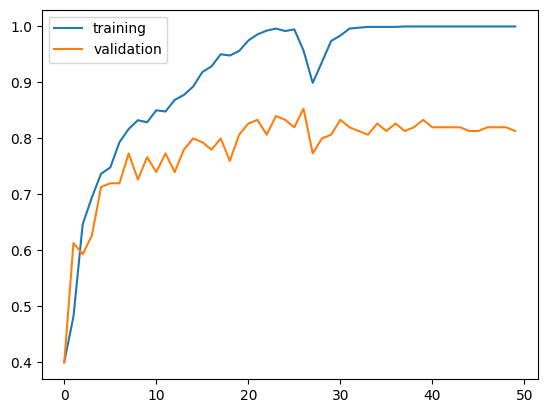

In [24]:
history = model.fit(X_train_new, y_train_categorical, validation_data=(X_val, y_val_categorical), epochs=50, batch_size=200)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Saving the Model

In [25]:
model.save_weights('CNN.h5')

Loading Images of test data

In [26]:
def load_images(data_dir):
    data = []
    labels = []
    for label in os.listdir(data_dir):
        for img in os.listdir(os.path.join(data_dir, label)):
            img_path = os.path.join(data_dir, label, img)
            img = load_img(img_path, target_size=(32, 32)) 
            img_data = img_to_array(img)
            data.append(img_data)
            labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    
    return data,labels

X_test,y_test=load_images('test')

numeric_labels_test = encoder.fit_transform(y_test)
num_classes = len(encoder.classes_)
y_test_categorical = to_categorical(numeric_labels_test, num_classes=num_classes)

X_test_normalized = X_test / 255.0

Loading the saved Model

In [27]:
model.load_weights('CNN.h5')


Predicting

In [29]:
class_probabilities = model.predict(X_test)
print(class_probabilities.shape)  # Ensure it's (300, 3)
print(class_probabilities)

10/10 [==============================] - 0s 33ms/step
(300, 3)
[[1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.00000

In [30]:
predicted_classes = np.argmax(class_probabilities, axis=1)  # Find the index of the max probability in each row
max_probabilities = np.max(class_probabilities, axis=1)  # Find the maximum probability in each row

# Multiply the predicted class by its probability
predicted_class_with_prob = predicted_classes * max_probabilities

print(predicted_class_with_prob)

[0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        1.        0.
 0.        0.        0.        1.        2.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        1.        0.        0.        0.
 0.        0.        0.        2.        0.        0.        2.
 1.        0.        0.        0.        0.        0.        0.
 1.        0.        0.        0.        0.        0.        1.
 0.        0.        0.        0.        0.        2.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        2.        2.        0.        0.        1.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        1.        1.        0.        0.        1.
 1.        1.        1.        1.       

In [31]:
print(numeric_labels_test)
print(predicted_classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 2 0 0 2 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0
 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 

Confusion Matrix

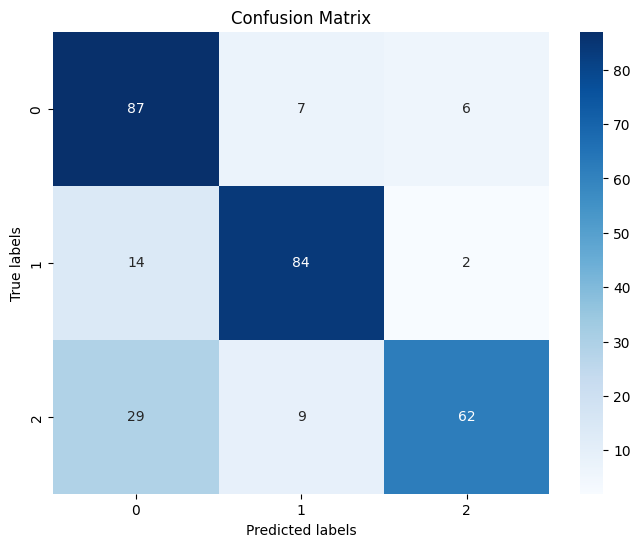

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(numeric_labels_test,predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy

In [35]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(numeric_labels_test, predicted_classes)
test_accuracy_percentage = test_accuracy * 100

print(f"Test Accuracy: {test_accuracy_percentage:.2f}%")

Test Accuracy: 77.67%
